## NYC Public School (2015 to 2017)

In this notebook, I analyzed the mean scores for Common Core Algebra for IN-Tech Academy 368 (10X368) and District 10 schools. I performed some exploratory data analysis, cleaned the data, ran some statisticals analysis and created a visualization. 

In [1]:
#importing all libraries needed
import pandas as pd
import numpy as np

In [2]:
#reading data set to a df
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
# Identifing how many rows and columns
df.shape

(212331, 15)

In [4]:
#Viewing the column names to copy and paste for cleaning/analysis
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [5]:
#Viewing the first 5 rows - I noted non-numerical values "s" and "na" values (will have to change them to NaN)
df.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [6]:
# Completed some reaseach and found out that School DBN is made up of: 
# District ( 2-digit num) + Borough (one-letter after district code) + School Num.
# Here are each borough assigned letter : 
# Brooklyn = K, Bronx = X, Queens = Q, Manhattan = M and Staten island = R
#I want to add two new columns to identity the brorough and district

df['Borough'] = df['School DBN'].str[2]
df['District'] = df['School DBN'].str[:2]
#view the df to confirm borough and district was added
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough,District
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na,M,01
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na,M,01
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na,M,01
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na,M,01
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na,M,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na,X,84
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na,X,84
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na,X,84
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na,X,84


In [7]:
#checking if there any null values 
df.isnull().sum()
#isnull().sum().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
Borough                         0
District                        0
dtype: int64

In [8]:
#find the rows with null values
df[df['Regents Exam'].isnull()]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough,District
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61,67.8,29,32.2,6,6.7,0,0,M,84
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55,67.9,26,32.1,5,6.2,0,0,M,84
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6,66.7,3,33.3,1,11.1,0,0,M,84
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,s,s,s,s,s,s,s,na,na,M,84
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34,63,20,37,6,11.1,0,0,M,84
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,s,s,s,s,s,s,s,na,na,M,84
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34,63,20,37,5,9.3,0,0,M,84
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27,75,9,25,1,2.8,0,0,M,84
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59,9,75,3,25,1,8.3,0,0,M,84
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52,66.7,26,33.3,5,6.4,0,0,M,84


In [9]:
#replacing all "s" and "na" with null values 
missing_values = ["s", "na"]
df.replace(missing_values, np.nan, inplace=True)
df.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough,District
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,01
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,NaN,NaN,M,01
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,NaN,NaN,M,01
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,01
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,01


In [10]:
# Creatig new dataframe and dropped null values
df2 = df.dropna(axis=0)
#confirming that there are null values in the data set anymore
df2.isnull().sum().sum()

0

# Comparing IN-Tech Academy 368 (DBN: 10X368) Mean Scores for Common Core Algebra to the rest of district 10 schools

In [11]:
#Creating new dataframe for district 10 schools only
df3 = df2[df2['District'] == '10'] 
df3

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough,District
5854,10X504,Kennedy Yabc,High school,Common Core Algebra,2016,7,55.7,6,85.7,1,14.3,0,0,0,0,X,10
6058,10X003,P.S. 3 Raul Julia Micro Society,K-8,Common Core Algebra,2015,50,60.8,34,68,16,32,1,2,8,16,X,10
6064,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2015,22,65.7,7,31.8,15,68.2,0,0,4,18.2,X,10
6065,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2016,13,76.7,0,0,13,100,5,38.5,11,84.6,X,10
6066,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2017,17,70.5,5,29.4,12,70.6,2,11.8,10,58.8,X,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166374,10X696,High School of American Studies at Lehman College,High school,Geometry,2015,18,86.1,0,0,18,100,17,94.4,17,94.4,X,10
166376,10X696,High School of American Studies at Lehman College,High school,Geometry,2015,14,86.4,0,0,14,100,12,85.7,12,85.7,X,10
166378,10X696,High School of American Studies at Lehman College,High school,Geometry,2015,43,87.6,1,2.3,42,97.7,33,76.7,33,76.7,X,10
166383,10X696,High School of American Studies at Lehman College,High school,Geometry,2016,12,91.9,0,0,12,100,12,100,12,100,X,10


In [12]:
# group by Regents Exam - will choose Common Core Algebra as the Regents Exam to compare In-Tech Acadmey 368 to rest d10 schools
df3.groupby(['Regents Exam'])['School Name'].count().sort_values()

Regents Exam
Common Core Algebra2      256
Geometry                  265
Algebra2/Trigonometry     326
Integrated Algebra        388
English                   423
Common Core Geometry      522
Common Core English       773
Common Core Algebra      1046
Name: School Name, dtype: int64

In [13]:
#creating df for Common Core Algebra only
df4 = df3[df3['Regents Exam'] == 'Common Core Algebra'] 
df4

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough,District
5854,10X504,Kennedy Yabc,High school,Common Core Algebra,2016,7,55.7,6,85.7,1,14.3,0,0,0,0,X,10
6058,10X003,P.S. 3 Raul Julia Micro Society,K-8,Common Core Algebra,2015,50,60.8,34,68,16,32,1,2,8,16,X,10
6064,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2015,22,65.7,7,31.8,15,68.2,0,0,4,18.2,X,10
6065,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2016,13,76.7,0,0,13,100,5,38.5,11,84.6,X,10
6066,10X037,P.S. X037 - Multiple Intelligence School,K-8,Common Core Algebra,2017,17,70.5,5,29.4,12,70.6,2,11.8,10,58.8,X,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166326,10X696,High School of American Studies at Lehman College,High school,Common Core Algebra,2016,8,83.8,0,0,8,100,7,87.5,8,100,X,10
166328,10X696,High School of American Studies at Lehman College,High school,Common Core Algebra,2016,54,85.1,1,1.9,53,98.1,50,92.6,53,98.1,X,10
166329,10X696,High School of American Studies at Lehman College,High school,Common Core Algebra,2017,14,87.2,0,0,14,100,14,100,14,100,X,10
166331,10X696,High School of American Studies at Lehman College,High school,Common Core Algebra,2017,7,83.4,0,0,7,100,7,100,7,100,X,10


In [14]:
#check the sum of total tested for each district 10 school - check IN-Tech Academy has a diverse/big pool of testers
df4.groupby(['School Name'])['Total Tested'].sum().sort_values()

School Name
Bronx Collaborative High School                         12
Grace Dodge Yabc                                        12
M.S. 390                                                90
Kennedy Yabc                                            90
East Fordham Academy for the Arts                      104
Dewitt Clinton Campus YABC                             117
P.S. X037 - Multiple Intelligence School               143
Walton Yabc                                            161
Providing Urban Learners Success In Education High     165
Creston Academy                                        207
P.S. 3 Raul Julia Micro Society                        220
Academy For Personal Leadership And Excellence         249
Bronx Dance Academy School                             264
I.S. 254                                               380
J.H.S. 080 The Mosholu Parkway                         417
High School of American Studies at Lehman College      595
The New School for Leadership and Journalism

In [15]:
#covert dtype.object to numeric to run analysis
df4['Mean Score'] = pd.to_numeric(df4['Mean Score'])
df4['Mean Score'].dtype

C:\Users\nquiroz\AppData\Local\Temp\ipykernel_19352\3434934480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Mean Score'] = pd.to_numeric(df4['Mean Score'])


dtype('float64')

In [16]:
#calculate mean of Common Core Algebra - Mean Scores for all schools in District 10 by Year
df4.groupby(['Year'])['Mean Score'].mean()

Year
2015    60.740187
2016    66.765439
2017    67.884946
Name: Mean Score, dtype: float64

In [17]:
#calculate mean of Common Core Algebra - Mean Scores for In-Tech Academy 368
df4[df4['School DBN']=='10X368'].groupby(['Year'])['Mean Score'].mean()


Year
2015    57.009091
2016    60.963636
2017    58.853846
Name: Mean Score, dtype: float64

In [18]:
#Creating dataframe with just the means of mean scores for In-Tech and District 10 Schools by Year to plot
df_mean = pd.DataFrame({ 
    'Year': [2015, 2016, 2017], 
    'District 10': [60.740187, 66.765439, 67.88494645], 
    'In-Tech Academy 368': [57.009091, 60.963636, 58.853846] 
}) 


<Axes: title={'center': 'Common Core Algebra: Average of Mean Scores \nDistrict 10 vs In-Tech Academy 368'}, xlabel='Year', ylabel='Average of Mean Scores'>

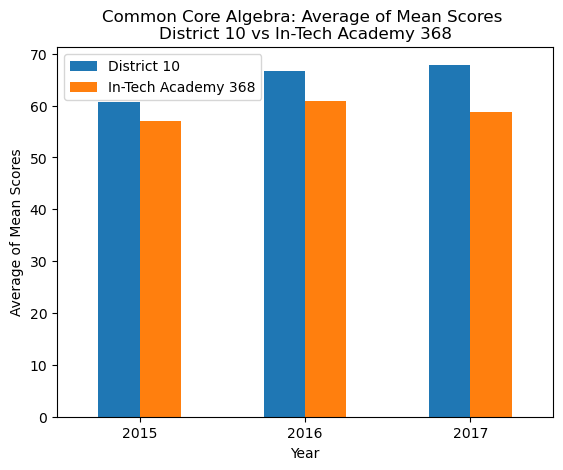

In [19]:
# plotting graph 
df_mean.plot(x="Year", y=["District 10", "In-Tech Academy 368"], kind="bar", ylabel = "Average of Mean Scores", 
             title = "Common Core Algebra: Average of Mean Scores \nDistrict 10 vs In-Tech Academy 368", rot = 0) 


In [20]:
#creating a new column to record the difference between the two for each year
df_mean['Delta'] = df_mean['In-Tech Academy 368'] - df_mean['District 10']
df_mean

,Year,District 10,In-Tech Academy 368,Delta
0,2015,60.740187,57.009091,-3.731096
1,2016,66.765439,60.963636,-5.801803
2,2017,67.884946,58.853846,-9.031100


## Conclusion: 
From 2015 to 2017, In-Tech Academy 368 students performed below the Common Core Algebra average mean scores compared to District 10 schools. IN-Tech Academy 368 was about 4 pts below average mean score of district 10 in 2015, 6 points below in 2016, and 9 points below in 2017. 
